Taller de Segmentación de Clientes con K-means en Python
Objetivo:
Aprender a realizar la segmentación de clientes utilizando el algoritmo K-means en Python. Este taller te guiará en los pasos para cargar los datos, procesarlos, aplicar el modelo de clustering, y finalmente interpretar los resultados para obtener grupos de clientes con características similares.

In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv

--2025-04-10 00:24:12--  https://github.com/javierherrera1996/lecture_analytics/raw/refs/heads/main/Mall_Customers.csv
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv [following]
--2025-04-10 00:24:12--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/refs/heads/main/Mall_Customers.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3981 (3.9K) [text/plain]
Saving to: ‘Mall_Customers.csv’

Mall_Customers.csv  100%[===================>]   3.89K  --.-KB/s    in 0s      

2025-04-10 00:24:12 (34.5 MB/s) - ‘

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
data = pd.read_csv('Mall_Customers.csv')

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40




Parte 1: Carga y exploración de datos
Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

In [4]:
# prompt: Carga y exploración de datos Instrucciones: Carga el siguiente conjunto de datos en un DataFrame de pandas. Luego, visualiza las primeras filas de los datos.

import pandas as pd

# Assuming 'Mall_Customers.csv' is already in your current working directory
# If not, use the !wget command as shown in the original code to download it.

data = pd.read_csv('Mall_Customers.csv')
data.head()


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Pregunta 1: ¿Cuáles son las variables que contiene el conjunto de datos? Describe brevemente qué información proporciona cada variable.

### El ID, género, edad, ingreso anual, puntaje de gasto

Parte 2: Preprocesamiento de los datos
Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.

In [5]:
# prompt: Preprocesamiento de los datos Instrucciones: Convierte la columna Gender a una variable numérica, y luego selecciona las columnas que utilizarás para aplicar el modelo de K-means. Finalmente, normaliza los datos para que todas las variables estén en la misma escala.
# data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
# ## Solo cuando tenemos mas variables
# data = pd.get_dummies(data, columns=['Gender'], drop_first=True)

data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
# Selecting features for K-means
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]
# Normalizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


Pregunta 2: ¿Por qué es importante normalizar los datos antes de aplicar el algoritmo K-means? Explica en qué consiste la normalización.



**Los datos deben estar en terminos similares para que tenga más sentido aplicar el algoritmo**


Parte 3: Método del codo para determinar el número óptimo de clusters
Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.


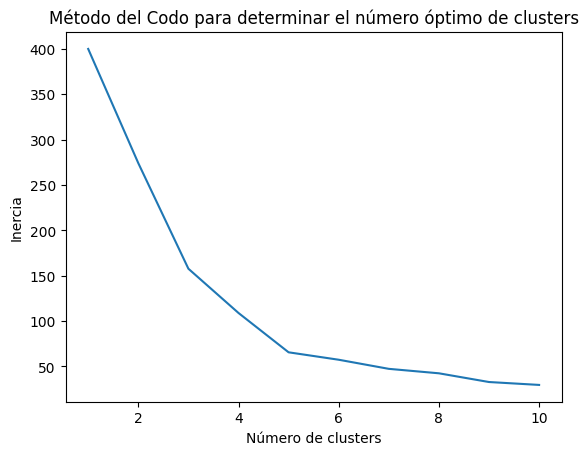

In [6]:
# prompt: Método del codo para determinar el número óptimo de clusters Instrucciones: Utiliza el método del codo para determinar cuántos clusters son óptimos para el conjunto de datos.
# inertia = []
# for i in range(1, 11):
#     kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
#     inertia.append(kmeans.inertia_)
# # Graficamos los resultados
# plt.plot(range(1, 11), inertia)
# plt.xlabel('Número de clusters')
# plt.ylabel('Inercia')
# plt.title('Método del Codo para determinar el número óptimo de clusters')
# plt.show()

import matplotlib.pyplot as plt
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    inertia.append(kmeans.inertia_)
# Graficamos los resultados
plt.plot(range(1, 11), inertia)
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.title('Método del Codo para determinar el número óptimo de clusters')
plt.show()


Pregunta 3: Observa la gráfica obtenida. ¿En qué punto parece formarse el "codo"? ¿Cuántos clusters crees que sería apropiado usar para este ejercicio?

Parte 4: Ajuste del modelo K-means y asignación de clusters
Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.

In [8]:
# prompt: Ajuste del modelo K-means y asignación de clusters Instrucciones: Ajusta el modelo K-means con el número de clusters que determinaste en el paso anterior y asigna a cada cliente un número de cluster.
# optimal_clusters = 5  # Ajusta según lo determinado en el método del codo
# kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
# data['Cluster'] = kmeans.fit_predict(X_scaled)

optimal_clusters = 5  # Ajusta según lo determinado en el método del codo
kmeans = KMeans(n_clusters=optimal_clusters, random_state=0)
data['Cluster'] = kmeans.fit_predict(X_scaled)


In [9]:
# prompt: # Agrupamos los datos por cluster y calculamos los promedios
# cluster_description = data.groupby('Cluster').mean()
# # Mostramos la descripción de cada cluster
# cluster_description

# Agrupamos los datos por cluster y calculamos los promedios
cluster_description = data.groupby('Cluster').mean()
# Mostramos la descripción de cada cluster
cluster_description


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,,
0,86.320988,0.592593,42.716049,55.296296,49.518519
1,162.000000,0.538462,32.692308,86.538462,82.128205
2,164.371429,0.457143,41.114286,88.200000,17.114286
3,23.000000,0.608696,45.217391,26.304348,20.913043
4,23.090909,0.590909,25.272727,25.727273,79.363636


Pregunta 4: ¿Qué observas en los resultados? ¿Cómo se distribuyen los clientes en los diferentes clusters?

Parte 5: Análisis descriptivo de los clusters
Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

In [10]:
# prompt: Análisis descriptivo de los clusters Instrucciones: Realiza un análisis descriptivo de cada cluster. Calcula la edad promedio, el ingreso anual y el puntaje de gasto promedio de cada grupo de clientes.

# Calculate the average age, annual income, and spending score for each cluster
cluster_description = data.groupby('Cluster').agg({'Age': 'mean', 'Annual Income (k$)': 'mean', 'Spending Score (1-100)': 'mean'})

# Display the cluster description
cluster_description


,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,
0,42.716049,55.296296,49.518519
1,32.692308,86.538462,82.128205
2,41.114286,88.200000,17.114286
3,45.217391,26.304348,20.913043
4,25.272727,25.727273,79.363636


Pregunta 5: ¿Qué diferencias observas entre los clusters en términos de edad, ingreso y puntaje de gasto? ¿Qué características definen a cada grupo?



Parte 6: Visualización de los clusters
Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

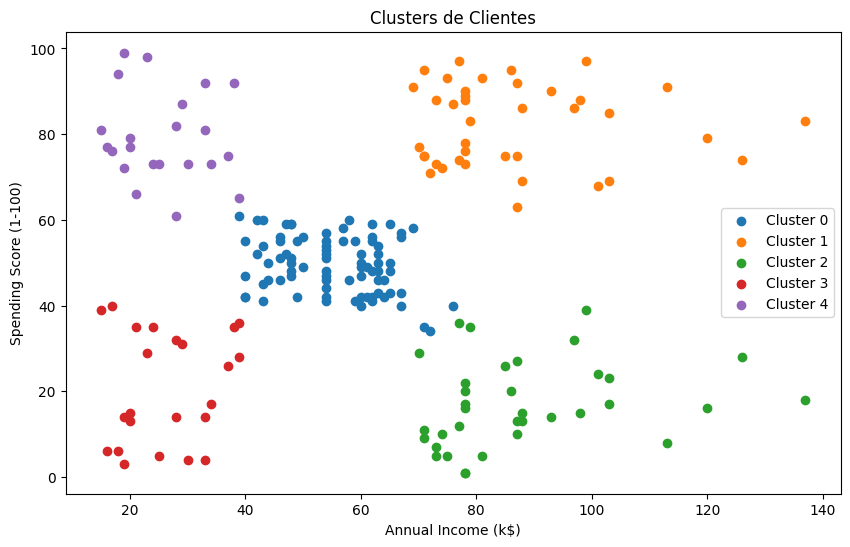

In [12]:
# prompt: Visualización de los clusters Instrucciones: Grafica los clusters en un espacio bidimensional utilizando dos de las características principales (por ejemplo, edad y puntaje de gasto).

import matplotlib.pyplot as plt
# Visualización de los clusters
plt.figure(figsize=(10, 6))
for cluster in range(optimal_clusters):
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}')


plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Clusters de Clientes')
plt.legend()
plt.show()


In [14]:
import plotly.graph_objs as go
import plotly.express as px
from sklearn.cluster import KMeans

def kmeans_plotter(data, k=5):
    # Perform K-Means clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data)

    # Add cluster labels to the dataframe
    data['label'] = kmeans.labels_

    # Create a 3D scatter plot with the clustered data
    fig = px.scatter_3d(data, x='Annual Income (k$)', y='Spending Score (1-100)', z='Age', color='label',
                         symbol='label', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'},
                         opacity=0.7, width=900, height=850,
                         title=f'K-Means Clustering with k={k}',
                         labels={'label': 'Cluster'},
                         color_discrete_map={})  # Remove color legend

    fig.update_layout(showlegend=False)  # Remove color legend
    return fig

# Assuming 'train_data' is your DataFrame containing the data

# Call the function to create the K-Means clustering plot
fig = kmeans_plotter(data)
fig.show()

Pregunta 6: Observa la gráfica. ¿Qué patrones puedes identificar visualmente en los datos? ¿Los clientes están claramente separados en grupos?


Parte 7: Interpretación y nombres de los clusters
Instrucciones: Basado en el análisis descriptivo y la visualización, asigna nombres a los clusters que describan a cada grupo de clientes. Por ejemplo, si un grupo tiene clientes jóvenes con altos puntajes de gasto, podrías llamarlo "Jóvenes con alto poder adquisitivo".

Pregunta 7: ¿Qué nombres asignarías a cada cluster? Justifica tu decisión basándote en las características promedio de los grupos.

Cluster 0 = Personas de mayor edad con un ingreso y gasto promedio
Cluster 1 = Personas de edad promedio con un ingreso y un consumo alto
Cluster 2 = Personas jovenes con pocos ingresos y bajo gasto
Cluster 3 = Personas aún más jovenes con pocos ingresos y bajo gasto
Cluster 4 = Personas jovenes con pocos ingresos pero con altos gastos

